# csv 파일 로드.

In [434]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#option float show all 
pd.options.display.float_format = '{:.2f}'.format


df = pd.read_csv('vgames2.csv', index_col = 0)
#df.drop('Unnamed: 0', axis=1,inplace=True) 

df


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.00,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.00,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.00,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.00,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.00,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.00,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.00,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.00,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.00,Action,Tecmo Koei,0.05,0.05,0.25,0.03


## 데이터 정제 (EDA)


year error cnt = 371
pop cnt = 16598
0.02


array([[<AxesSubplot:title={'center':'Year'}>]], dtype=object)

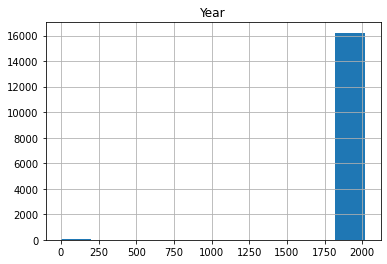

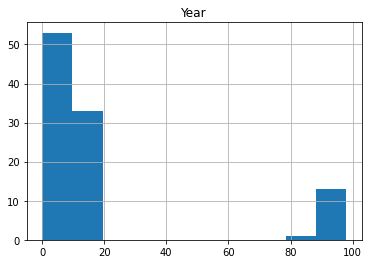

In [435]:
df_year_error= df[ (df['Year'].isnull()) | (df['Year'] < 250)]

print( 'year error cnt =',df_year_error.shape[0])
print( 'pop cnt =',df.shape[0])

print( round( df_year_error.shape[0] / df.shape[0] ,2))

# 데이터를 살펴본 결과
# 연도가 Nan or 0인 결측치, 그리고 250 이하의 이상치 데이터가 
# 전체데이터의 0.02%라서 제거하기로 결정했습니다.

# histogram 으로 250이하의 값도 이상치라고 판단.  

df.hist( 'Year')
df_year_error.hist( 'Year') 

#중복값도 찾았으나 Year이 0이므로 결측치 제거할때 함께 제거. 
#df[df.duplicated()] 

In [436]:
df1 = df.copy()

# 데이터 제거.
del_con_byYear = df_year_error.index
df1.drop(del_con_byYear, inplace=True)


#장르고,퍼블리셔고 일단 nan 이면 제거. 
df1.dropna(inplace=True)
df1.reset_index(drop=True,inplace = True)


#year int로 변환
df1['Year'] = df1['Year'].astype(int)

df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16141 entries, 0 to 16140
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16141 non-null  object
 1   Platform     16141 non-null  object
 2   Year         16141 non-null  int32 
 3   Genre        16141 non-null  object
 4   Publisher    16141 non-null  object
 5   NA_Sales     16141 non-null  object
 6   EU_Sales     16141 non-null  object
 7   JP_Sales     16141 non-null  object
 8   Other_Sales  16141 non-null  object
dtypes: int32(1), object(8)
memory usage: 1.0+ MB


In [437]:
# 숫자만 들어있어야 할 컬럼에 M,K라는 스트링이 존재
# 보통 100만을 M, 1000을 K로 표기해서 사용 함. 
# 숫자로 대체 하는 작업 시행. 

sales = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales'] 

# 방법 1.
# 일단 삭제
def delete_MK():
    
    s1 = set([])
    for v in sales:
        idx = df1[ (df1[v].str.count('M')>0) | (df1[v].str.count('K')>0) ].index
        s1.update(idx)
    #print(s1)
    #print( 'total=', len(s1) / df1.shape[0] )

    df1.drop( s1, inplace=True)
    df1.reset_index(drop=True,inplace = True)




# 방법2.
# M, K데이터 들어있는 데이터 변환.
def convertMK(ss):

    if type(ss) == float:
        pass
    
    elif ss.count('M')>0:
        ss = float(ss.split('M')[0])*1000000
    
    elif ss.count('K')>0:
        ss = float(ss.split('K')[0])*1000
    
    return float(ss) 

def change_MK():
    for c in sales:
        df1[c] = df1[c].apply(convertMK)        
        

#방법1 
delete_MK()
#방법2
#change_MK()

#숫자로 타입변경
df1[sales] = df1[sales].astype(float)
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15382 entries, 0 to 15381
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         15382 non-null  object 
 1   Platform     15382 non-null  object 
 2   Year         15382 non-null  int32  
 3   Genre        15382 non-null  object 
 4   Publisher    15382 non-null  object 
 5   NA_Sales     15382 non-null  float64
 6   EU_Sales     15382 non-null  float64
 7   JP_Sales     15382 non-null  float64
 8   Other_Sales  15382 non-null  float64
dtypes: float64(4), int32(1), object(4)
memory usage: 1021.6+ KB


In [438]:
# 지역별 판매량...
df1[sales].sum()


NA_Sales      4055.22
EU_Sales      2251.70
JP_Sales      1192.14
Other_Sales    743.86
dtype: float64

In [439]:
#지역에 따라서 선호하는 게임 장르가 다를까?
#선호하는 게임은 많이 팔린 게임이라고 가정.
#지역별 많이 팔린 장르별 내림차순.

# - [x]  지역으로 그룹화
# - [x]  많이 팔린 게임 순 정렬
# - [x]  어느지역에서 어떤 장르가 많이 팔렸는지 시각화


df1['Total_Sales'] = df1['NA_Sales'] + df1['EU_Sales'] + df1['JP_Sales'] + df1['Other_Sales']

salesAll =[x for x in sales]
salesAll.append('Total_Sales')
salesAll


df_Genre = df1.groupby('Genre')[salesAll].sum()
df_Genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,801.89,486.60,149.85,176.14,1614.48
Adventure,97.29,60.65,49.20,16.06,223.20
Fighting,210.51,94.18,82.58,34.33,421.60
Misc,380.36,200.14,99.47,69.97,749.94
Platform,410.96,184.11,121.88,47.88,764.83
Puzzle,118.40,49.95,56.16,12.13,236.64
Racing,334.14,222.66,50.60,73.48,680.88
Role-Playing,283.86,160.10,314.15,50.86,808.97
Shooter,544.63,293.38,36.53,96.68,971.22


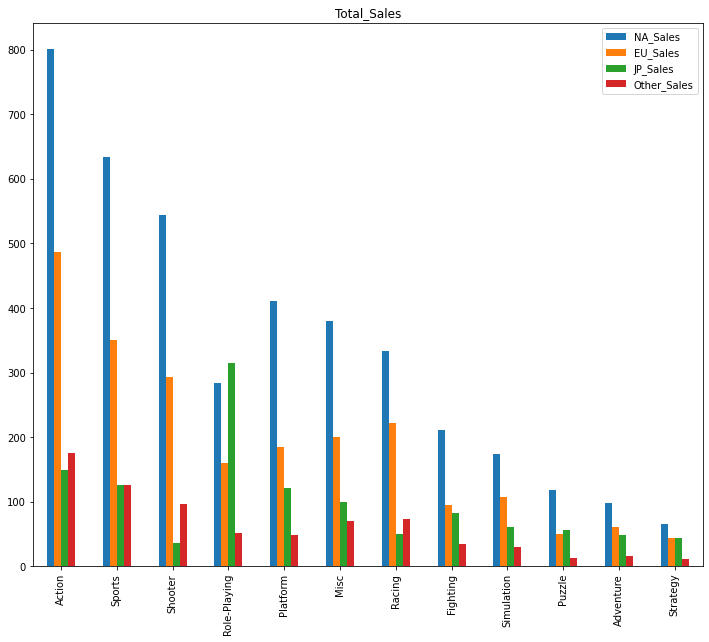

In [440]:
df_Genre.sort_values(by='Total_Sales',ascending=False,inplace=True)
df_Genre[sales].plot.bar( xlabel='', title='Total_Sales',figsize=(12,10))
plt.show();


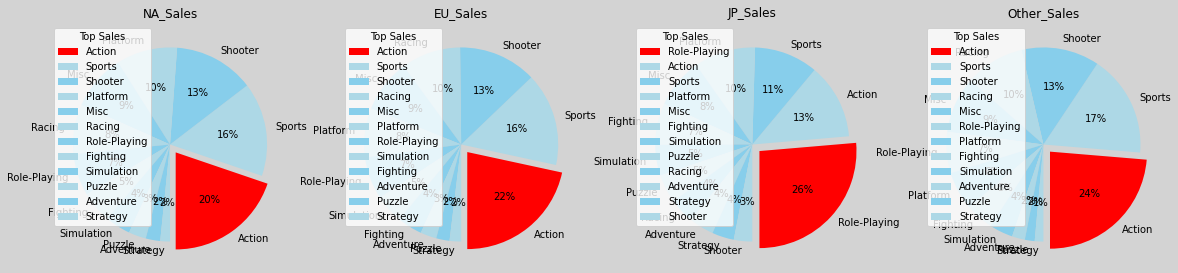

In [441]:

def ShowPie(isAll):
    
    fig, ax = plt.subplots(figsize = (20,12))
    ax.grid(True)
    fig.set_facecolor('lightgrey')

    for i,v in enumerate(sales):
        
        df_sorted = df_Genre.sort_values(by=v,ascending=False)[v]
        
        if isAll == False:
            df_sorted = df_sorted.head(3)

        #Series 의 컬럼은 index
        mylabels = df_sorted.index
        # series 개수 만큼 넣어줘야함. index 순서. 가운데서 얼만큼 떨어트릴것인가?
        myExplode = [0 for _ in mylabels] 
        myExplode[0] = 0.1
        
        myColor = [ 'skyblue' if i%2==0 else 'lightblue' for i,x in enumerate(myExplode)] 
        myColor[0] = 'red'

        plt.subplot(1, 4, i+1)
        plt.pie( df_sorted , autopct='%.0f%%',labels = mylabels,explode = myExplode, startangle = 270, colors=myColor )
        plt.title(v)
        plt.legend(title = "Top Sales",loc='upper left') 
        
    plt.show();

ShowPie(True)


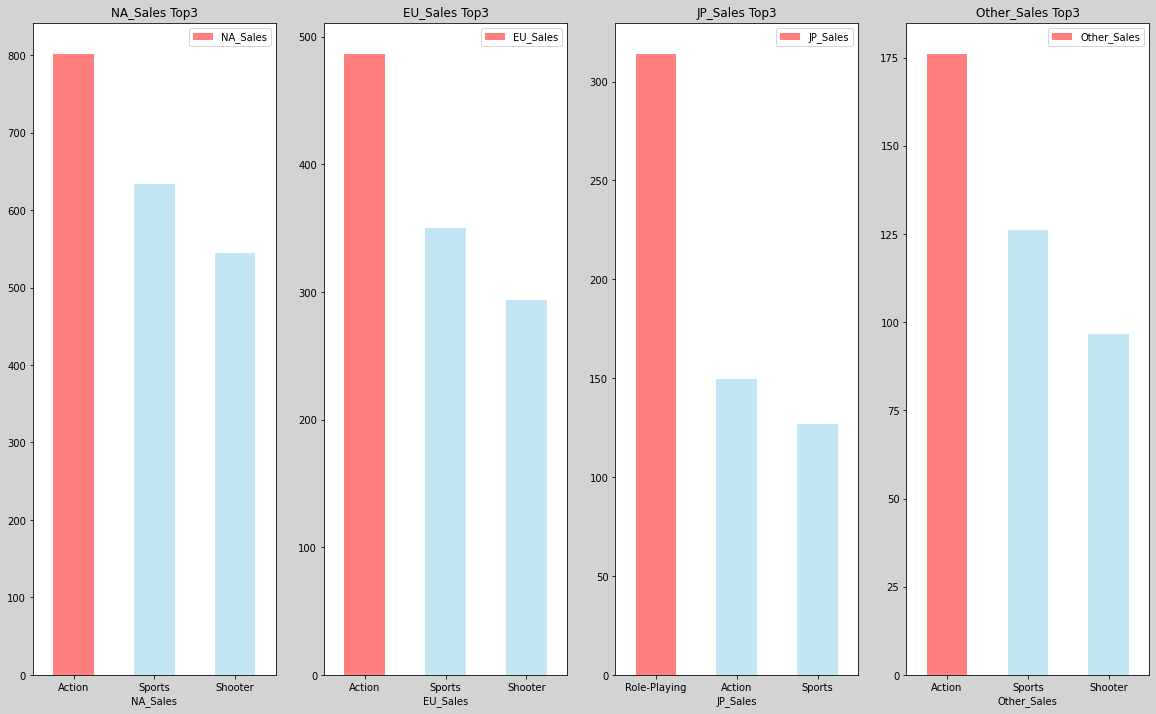

In [442]:

# 위 표를 보면 지역별 각 장르의 판매량입니다. 각 장르의 Top3가 전체의 50% 가까이 되기때문에 
# top3의 판매량만 조회해도 어떤 장르를 선호하는지 알 수 있습니다.
# JP지역은 롤플레잉을 선호하고 그외에 NA,EU,Other 지역은 액션을 선호하는것을 알 수 있습니다.


#지역별 top3
fig, ax = plt.subplots(figsize = (20,12))
fig.set_facecolor('lightgrey')

for i,v in enumerate(sales):
    
    df_sorted = df_Genre.sort_values(by=v,ascending=False)[v].head(3)
    mylabels = df_sorted.index
    colors = ['skyblue' for _ in range(len(mylabels))]
    colors[0] = 'r'

    plt.subplot(1, 4, i+1)
    df_sorted.plot.bar(xlabel=v, title=v+' Top3', color=colors, rot=0, alpha=0.5,legend=True)#,xtick=100)
    #plt.bar( x= df_sorted.index, height=df_sorted.values,color=colors, alpha=0.5 ,width = .5)
    
plt.show()



In [597]:
 
## df1['Total_Sales'] = df1['NA_Sales'] + df1['EU_Sales'] + df1['JP_Sales'] + df1['Other_Sales']
# salesAll

df_gy = df1[ ['Year','Genre','Total_Sales']]
df_gy = df_gy.groupby(['Year','Genre']).sum()
df_gy = df_gy.sort_values( by='Year')
df_gy





Total_Sales
Year Genre                    
1980 Action               0.34
     Fighting             0.77
     Misc                 2.47
     Shooter              7.07
1981 Simulation           0.44
...                        ...
2016 Adventure            1.48
     Action              19.62
     Racing               1.62
2017 Action               0.01
     Role-Playing         0.04

[386 rows x 1 columns]

In [599]:
#연도별 게임의 트렌드가 있을까 ? 
# - [ ]  연도별 장르 나누기
# - [ ]  연도별 많이 팔린 장르 top 1 뽑기
# - [ ]  라인 플롯.  x축 연도 y축은 판매량, text로 제일 많이 팔린 장르 보여주기
# - [ ]  연도별로 많이 팔린 장르 시각화



#멀티인덱스를 Year 인덱스로 만들려는 삽질.. 
df_gy['Year2'] = df_gy.index
df_g1 = df_gy[ ['Year2','Total_Sales']]
df_g1 = df_g1.reset_index(drop=True)
df_g1



,Year2,Total_Sales
0,"(1980, Action)",0.34
1,"(1980, Fighting)",0.77
2,"(1980, Misc)",2.47
3,"(1980, Shooter)",7.07
4,"(1981, Simulation)",0.44
...,...,...
381,"(2016, Adventure)",1.48
382,"(2016, Action)",19.62
383,"(2016, Racing)",1.62
384,"(2017, Action)",0.01


In [600]:
#멀티 인덱스 -> 튜플을 나눠서 인덱스 화. 
years = []
genre = []

for v in df_g1['Year2']:
    years.append(v[0])
    genre.append(v[1])

df_g1['Year'] = years
df_g1['Genre'] = genre


df_g2 = df_g1[ ['Year','Genre','Total_Sales'] ]
df_g2.sort_values(by ='Year')
df_g2 = df_g2.reset_index(drop=True)
df_g2

,Year,Genre,Total_Sales
0,1980,Action,0.34
1,1980,Fighting,0.77
2,1980,Misc,2.47
3,1980,Shooter,7.07
4,1981,Simulation,0.44
...,...,...,...
381,2016,Adventure,1.48
382,2016,Action,19.62
383,2016,Racing,1.62
384,2017,Action,0.01


In [638]:
# grouping된 Year의 Total_Sales값들을
# year별 max 값으로 설정해버린다 캬. transform(max)
df_g2_max = df_g2.groupby(by=['Year'])['Total_Sales'].transform(max)
#df_g2_max

# 기존 df의 값과 같은 열만 True로 하고 나머지는 False로 만드는 series 생성 
df_max_arr =  df_g2_max == df_g2['Total_Sales']
df_max_arr

# 최대값 열만 기존 df에서 가져온다.
#year genre max_sales
df_ygm = df_g2[df_max_arr]

#최종적으로 연도별 장르별 최대판매량 테이블이 만들어진다. 지쟈스. 
df_ygm.reset_index(drop=True, inplace=True)
df_ygm


,Year,Genre,Total_Sales
0,1980,Shooter,7.07
1,1981,Action,12.82
2,1982,Puzzle,10.04
3,1983,Platform,6.93
4,1984,Shooter,31.10
5,1985,Platform,41.67
6,1986,Action,13.74
7,1987,Fighting,5.42
8,1988,Platform,20.27
9,1989,Puzzle,37.69


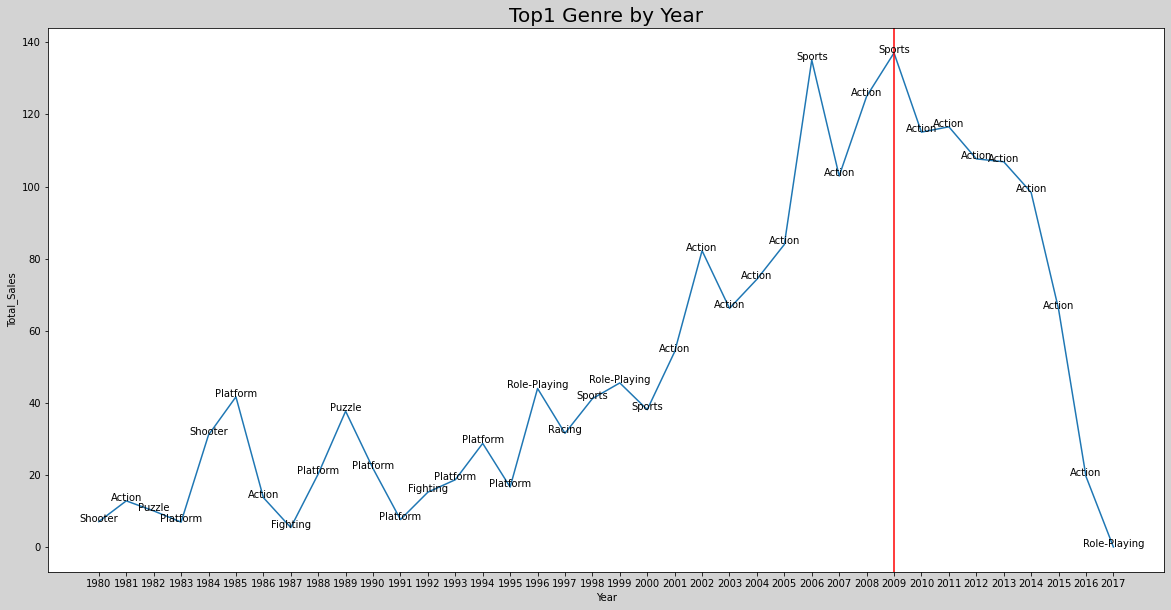

In [698]:
#df_ygm


fig, ax = plt.subplots(figsize=(20, 10))
fig.set_facecolor('lightgrey')
g = sns.lineplot(x = 'Year', y='Total_Sales',data = df_ygm)


t_genre = df_ygm['Genre']
t_year =  df_ygm['Year']
t_maxSales = df_ygm['Total_Sales']

plt.xticks( ticks= t_year)
plt.title('Top1 Genre by Year', size='20')

for i,v in enumerate(t_maxSales):    
    g.text( x= t_year[i] ,y=v ,s= t_genre[i], ha='center',size=10) #,color='#000'
    #print(dfgenre[index])
    
maxTotal= df_ygm['Total_Sales'].max()
maxYear = df_ygm[df_ygm['Total_Sales'] == maxTotal].Year.values
maxYear = int(maxYear)
#print( maxYear)
plt.axline( (maxYear,0),(maxYear,1),color = 'red')



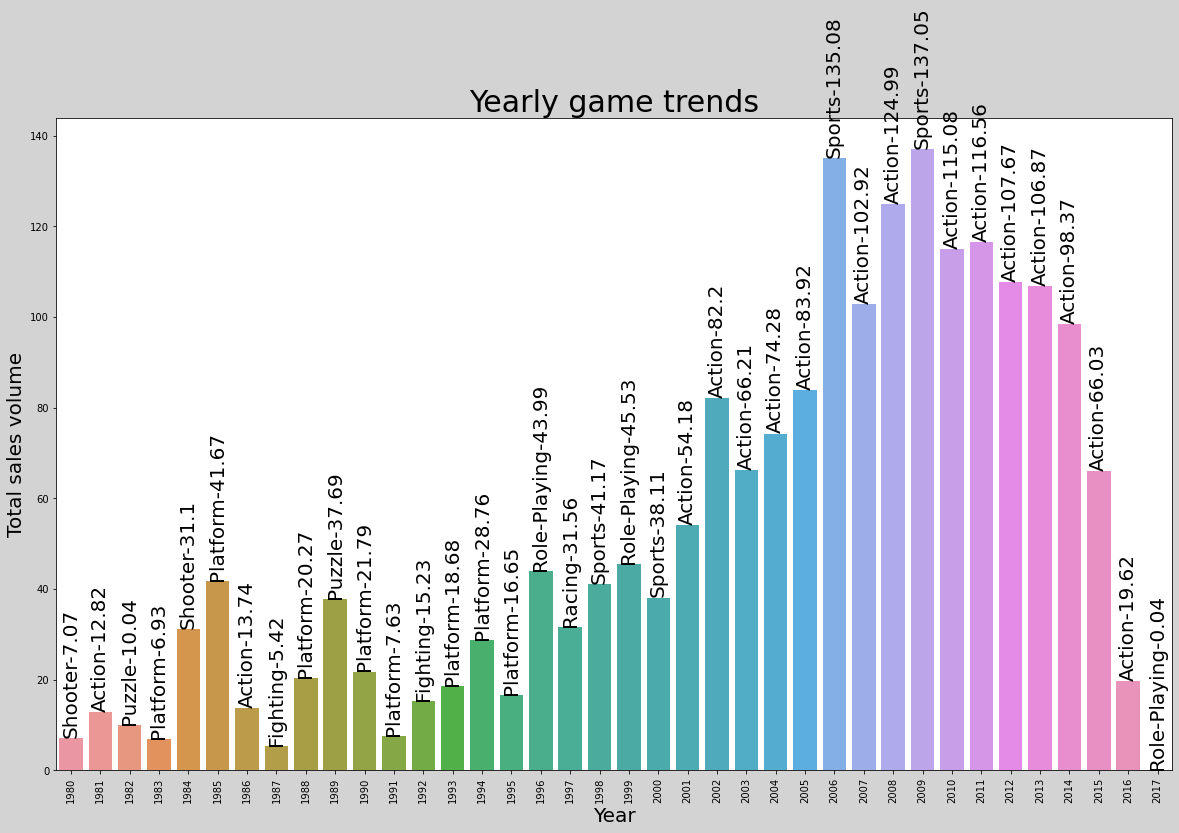

In [575]:

year_sale_dx = df1.groupby(by=['Year', 'Genre'])['Total_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Total_Sales'].transform(max) == year_sale_dx['Total_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)

genre = year_sale_max['Genre']

fig = plt.figure(figsize=(20, 12))
fig.set_facecolor('lightgrey')
g = sns.barplot(x='Year', y='Total_Sales', data=year_sale_max)

index = 0
for value in year_sale_max['Total_Sales']:
    g.text(index, value + 1, str(genre[index] + '-' +str(round(value, 2))), color='#000', size=20, rotation= 90, ha="center")
    index += 1

plt.title("Yearly game trends", fontsize=30)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Total sales volume", fontsize=20)

plt.xticks(rotation=90)
plt.show()


In [470]:
year_sale_dx = df1.groupby(by=['Year', 'Genre'])['Total_Sales'].sum().reset_index()
year_sale_dx
#year_sale = year_sale_dx.groupby(by=['Year'])['Total_Sales'].transform(max) == year_sale_dx['Total_Sales']
#year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)
#year_sale

,Year,Genre,Total_Sales
0,1980,Action,0.34
1,1980,Fighting,0.77
2,1980,Misc,2.47
3,1980,Shooter,7.07
4,1981,Action,12.82
...,...,...,...
381,2016,Simulation,0.30
382,2016,Sports,9.61
383,2016,Strategy,0.41
384,2017,Action,0.01


In [475]:
year_sale_dx.groupby(by=['Year'])['Total_Sales'].transform(max)

0      7.07
1      7.07
2      7.07
3      7.07
4     12.82
       ... 
381   19.62
382   19.62
383   19.62
384    0.04
385    0.04
Name: Total_Sales, Length: 386, dtype: float64

In [506]:
year_sale = year_sale_dx.groupby(by=['Year'])['Total_Sales'].transform(max) == year_sale_dx['Total_Sales']
year_sale
#print(type(year_sale))

0      False
1      False
2      False
3       True
4       True
       ...  
381    False
382    False
383    False
384    False
385     True
Name: Total_Sales, Length: 386, dtype: bool

In [563]:
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)
year_sale_max.index = year_sale_max['Year']
year_sale_max.drop('Year', axis=1,inplace=True)
year_sale_max

#year_sale_max.plot.bar()#x='Year', y='Total_Sales')


#g = year_sale_max.plot.bar( xlabel='', title='Total_Sales',figsize=(12,10),legend=True)
# fig = sns.boxplot(x='Year', y='Total_Sales', data=year_sale_max)  #figsize=(20, 12))
# fig.set_facecolor('lightgrey')
#fig = plt.figure()

# index = 0
# for v in year_sale_max['Total_Sales']:
#     fig.text( index , v+1, 'G')

#plt.show()

# index = 0
# for value in year_sale_max['Total_Sales']:
#     g.text(index, value + 1, str(genre[index] + '-' +str(round(value, 2))), color='#000', size=20, rotation= 90, ha="center")
#     index += 1

# plt.title("Yearly game trends", fontsize=30)
# plt.xlabel("Year", fontsize=20)
# plt.ylabel("Total sales volume", fontsize=20)

# plt.xticks(rotation=90)
# plt.show()


,Genre,Total_Sales
Year,,
1980,Shooter,7.07
1981,Action,12.82
1982,Puzzle,10.04
1983,Platform,6.93
1984,Shooter,31.10
1985,Platform,41.67
1986,Action,13.74
1987,Fighting,5.42
1988,Platform,20.27


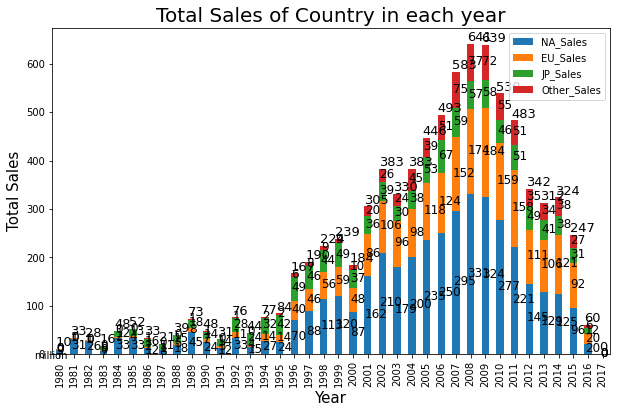

In [562]:
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt


# 연도 x 장르 데이터 생성
year_country = df1.groupby('Year').sum()
year_country = year_country.iloc[:,:-1]
yc_graph = year_country

# 그래프 생성
yc_graph.plot.bar(stacked=True,figsize=(10,6))
plt.title('Total Sales of Country in each year', fontsize=20)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Total Sales',fontsize=15)

# 연도별 매출액 표시
for i in range(len(yc_graph.index)):
  plt.text(i-0.25,yc_graph.iloc[i,:].sum()+6,int(yc_graph.iloc[i,:].sum()), size = 13)

# Y축 단위 표시
plt.text(-1.7,-10,s='million')

# 지역별 매출액 표시
yc_ind = yc_graph.index
x = range(len(yc_ind))
yc_col = yc_graph.columns

for i in range(len(yc_ind)):
  sum = 0
  value = 0
  for j in range(len(yc_col)):
    sum += yc_graph.iloc[i,j]
    value =int(yc_graph.iloc[i,j])
    plt.text(x[i]-0.2,sum - (yc_graph.iloc[i,j]/2)-5,value,size=12)

plt.show();

In [448]:

#출고량이 높은 게임에 대한 분석 및 시각화 프로세스



## 정리
> #지역에 따라서 선호하는 게임 장르가 다를까? 
 - yes

> #연도별 게임의 트렌드가 있을까 ?
 - ...

> #출고량이 높은 게임에 대한 분석 및 시각화 프로세스
 - 작업중.

### 🔥 FrameWork

blah blah

In [449]:
# code